In [1]:
import pandas as pd
import numpy as nnp
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set()
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
try:
    df = pd.read_csv('owid-covid-data.csv')
except:
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    df.to_csv('owid-covid-data.csv')
    
display(df.head())
print(df.shape)
print(df.columns)
print(df.describe())

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


(12874, 16)
Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')
         total_cases     new_cases  total_deaths    new_deaths  \
count   12874.000000  12874.000000  12874.000000  12874.000000   
mean     4037.140283    207.195821    241.438015     14.776216   
std     28893.309555   1484.670120   1886.523965    118.184618   
min         0.000000      0.000000      0.000000      0.000000   
25%         1.000000      0.000000      0.000000      0.000000   
50%        21.000000      1.000000      0.000000      0.000000   
75%       350.750000     24.000000      6.000000      0.000000   
max    869172.000000  37289.000000  49963.000000   4928.000000   

       total_cases_per_million  new_cases_

In [16]:
percent_missing = (df.isna().sum().sort_values(ascending = False) / df.shape[0]) * 100
percent_missing

new_tests                   79.571229
new_tests_per_thousand      79.540158
tests_units                 76.961317
total_tests_per_thousand    76.961317
total_tests                 76.961317
new_deaths_per_million       1.623427
total_deaths_per_million     1.623427
new_cases_per_million        1.623427
total_cases_per_million      1.623427
new_deaths                   0.000000
total_deaths                 0.000000
new_cases                    0.000000
total_cases                  0.000000
date                         0.000000
location                     0.000000
iso_code                     0.000000
dtype: float64

Interesting insight here that over 75% if the countries in this dataset have not done any testing. We will live this to find more insights. 

In [22]:
## Here tyring to create individual dataframes for each country might be not necessary 

# df.location.unique()

# locations = []
# dfs_location = {}
# for i in df.location.unique():
#     locations.append(i)
# locations
# for location in locations:
#     dfs_location[location + '_df'] = df[df['location'] == location]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


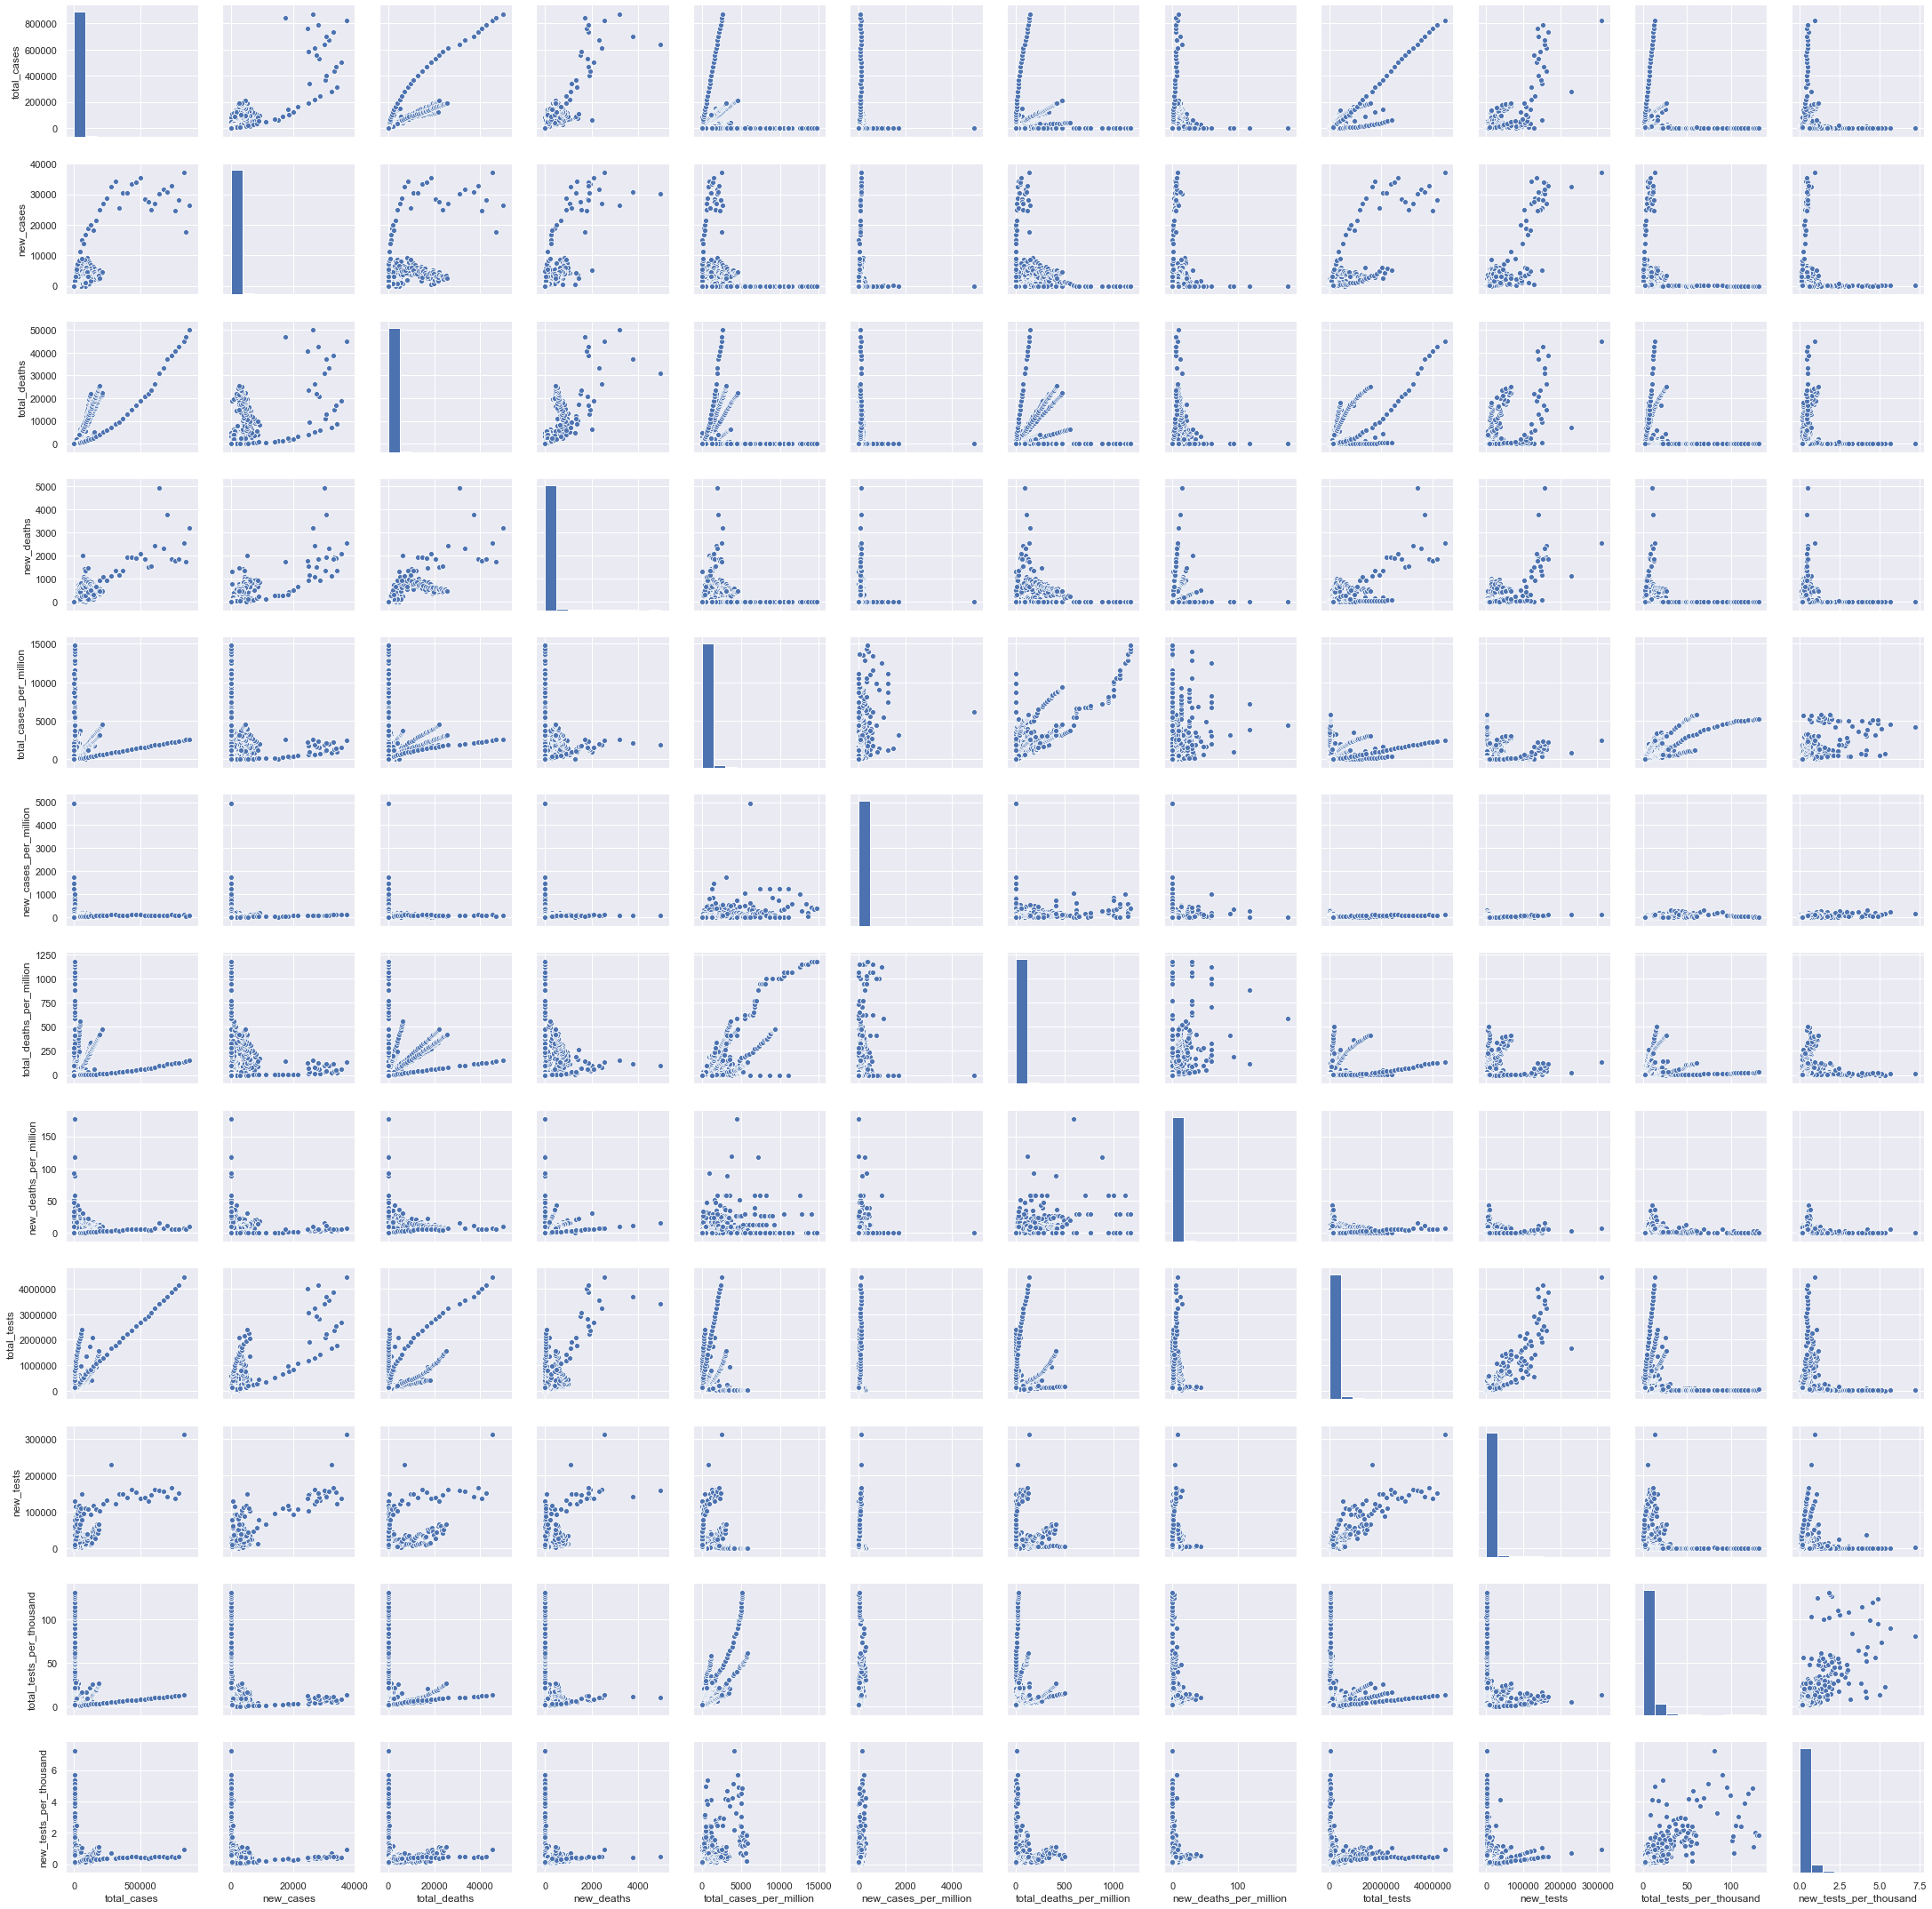

In [27]:
g = sns.pairplot(df)

Some interesting insights from this pair plot in particular that caughht my eye were :
* total_cases_per_million vs total_tests_per_thousand
* total_deats vs total_tests
* total_cases vs total_tests
* total_tests vs new_tests
* new_cases vs total_deaths

In [39]:
df.location.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands', 'France', 'Faeroe Islands', 'Gabon',
 

In [44]:
int_countries = ['United States', 'Iran', 'Italy', 'China', 'Spain', 'Russia', 'Saudi Arabia', 'India', 'South Korea']
df_countries = df[df['location'].isin(int_countries)]  # creating a df based on the countires we're interested in 
display(df_countries.head())
df_countries.shape

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
2279,CHN,China,2019-12-31,27,27,0,0,0.019,0.019,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2280,CHN,China,2020-01-01,27,0,0,0,0.019,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2281,CHN,China,2020-01-02,27,0,0,0,0.019,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2282,CHN,China,2020-01-03,44,17,0,0,0.031,0.012,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2283,CHN,China,2020-01-04,44,0,0,0,0.031,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN


(977, 16)

In [46]:
df_countries.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')

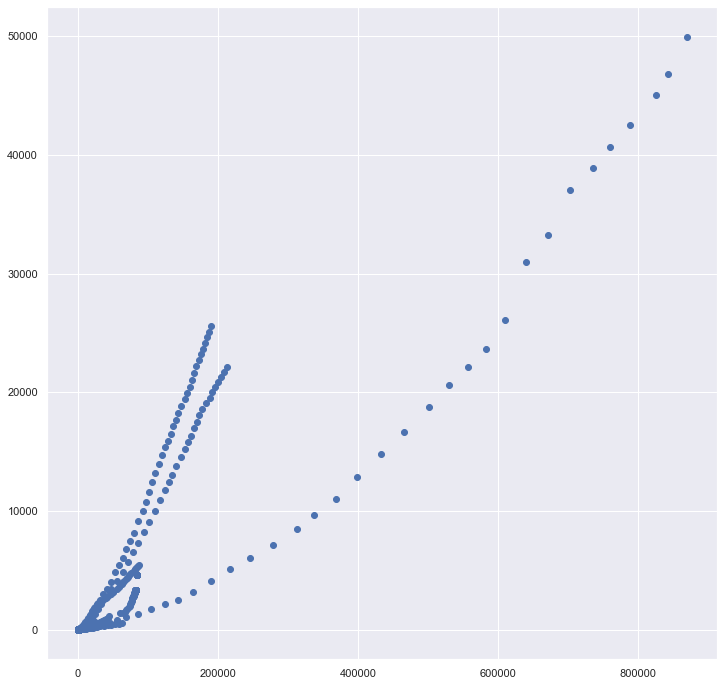

In [56]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(x='total_cases', y='total_deaths', data=df_countries)

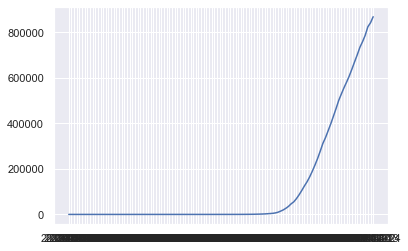

In [5]:
us_data = df[df['location'] == 'United States']

def plot_figure(x, y, title, df):
    plt.plot(df[x], df[y])
    
    
plot_figure('date', 'total_cases', df = us_data, title = 'adfas')